Silhouette Score: 0.5683300355718316


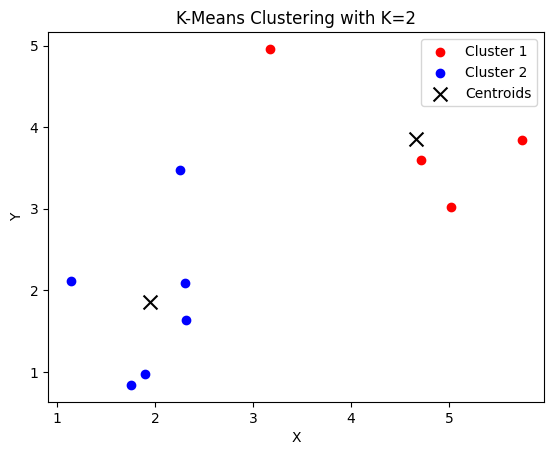

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Function to calculate Euclidean distance between two points
def euclidean_dist(point1, point2):
    return np.sqrt(sum((x - y) ** 2 for x, y in zip(point1, point2)))

# Randomly select K initial centroids
def random_centroid(data, K):
    return random.sample(data, K)

# Assign each point to the nearest centroid
def assign_clusters(data, centroids):
    clusters = [[] for _ in centroids]
    labels = []  # Store cluster labels for each point
    for point in data:
        distances = [euclidean_dist(point, centroid) for centroid in centroids]
        closest_centroid = distances.index(min(distances))
        clusters[closest_centroid].append(point)
        labels.append(closest_centroid)
    return clusters, labels

# Update centroids based on the mean of the cluster points
def update_centroids(clusters):
    new_centroids = []
    for cluster in clusters:
        if len(cluster) > 0:
            mean_x = np.mean([point[0] for point in cluster])
            mean_y = np.mean([point[1] for point in cluster])
            new_centroids.append([mean_x, mean_y])
        else:
            new_centroids.append(random.choice(data))  # Reassign if cluster is empty
    return new_centroids

# K-Means algorithm
def kmeans(data, K, max_iters=100):
    centroids = random_centroid(data, K)
    for _ in range(max_iters):
        clusters, labels = assign_clusters(data, centroids)
        new_centroids = update_centroids(clusters)
        if np.all(np.array(centroids) == np.array(new_centroids)):
            break
        centroids = new_centroids
    return clusters, centroids, labels

# Silhouette Score calculation
def silhouette_score(data, labels, clusters):
    scores = []
    for idx, point in enumerate(data):
        cluster_idx = labels[idx]
        # Calculate intra-cluster distance (a)
        a = np.mean([euclidean_dist(point, other) for other in clusters[cluster_idx] if not np.array_equal(point, other)])
        # Calculate nearest-cluster distance (b)
        b = float('inf')
        for other_cluster_idx, other_cluster in enumerate(clusters):
            if other_cluster_idx != cluster_idx and len(other_cluster) > 0:
                distance = np.mean([euclidean_dist(point, other) for other in other_cluster])
                b = min(b, distance)
        # Silhouette score for the point
        score = (b - a) / max(a, b) if max(a, b) > 0 else 0
        scores.append(score)
    return np.mean(scores)

# Example data
data = [[1.9, 0.97], [1.76, 0.84], [2.32, 1.63], [2.31, 2.09], [1.14, 2.11],
        [5.02, 3.02], [5.74, 3.84], [2.25, 3.47], [4.71, 3.60], [3.17, 4.96]]

# Perform K-Means clustering
K = 2
clusters, centroids, labels = kmeans(data, K)

# Calculate Silhouette Score
silhouette_avg = silhouette_score(data, labels, clusters)
print(f"Silhouette Score: {silhouette_avg}")

# Plot the final clusters and centroids
colors = ['red', 'blue', 'green', 'purple', 'orange', 'cyan']
for i, cluster in enumerate(clusters):
    cluster_points = np.array(cluster)
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[i], label=f'Cluster {i+1}')
plt.scatter([centroid[0] for centroid in centroids], [centroid[1] for centroid in centroids],
            color='black', marker='x', s=100, label='Centroids')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title(f'K-Means Clustering with K={K}')
plt.show()


Silhouette Score: 0.5683300355718316


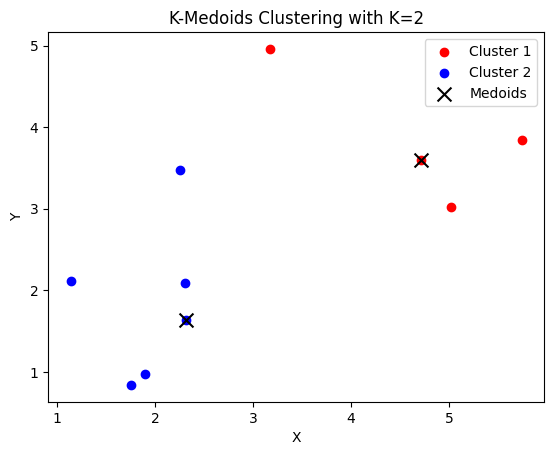

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Function to calculate Euclidean distance between two points
def euclidean_distance(point1, point2):
    return np.sqrt(sum((x - y) ** 2 for x, y in zip(point1, point2)))

# Update medoid by finding the point with the minimum total distance within the cluster
def update_medoid(cluster):
    if len(cluster) == 0:
        return None
    distances = np.zeros(len(cluster))
    for i in range(len(cluster)):
        distances[i] = sum(euclidean_distance(cluster[i], cluster[j]) for j in range(len(cluster)))
    medoid_index = np.argmin(distances)
    return cluster[medoid_index]

# Assign each point to the nearest medoid
def assign_points_to_medoids(data, medoids):
    clusters = [[] for _ in medoids]
    labels = []  # Store the cluster labels
    for point in data:
        distances = [euclidean_distance(point, medoid) for medoid in medoids]
        closest_medoid_index = np.argmin(distances)
        clusters[closest_medoid_index].append(point)
        labels.append(closest_medoid_index)
    return clusters, labels

# K-Medoids algorithm
def k_medoids(data, k, max_iterations=100):
    # Randomly initialize medoids
    medoids = random.sample(data, k)
    for _ in range(max_iterations):
        clusters, labels = assign_points_to_medoids(data, medoids)
        new_medoids = [update_medoid(cluster) for cluster in clusters]
        if np.array_equal(medoids, new_medoids):
            break
        medoids = new_medoids
    return clusters, medoids, labels

# Silhouette Score calculation
def silhouette_score(data, labels, clusters):
    scores = []
    for idx, point in enumerate(data):
        cluster_idx = labels[idx]
        # Calculate intra-cluster distance (a)
        a = np.mean([euclidean_distance(point, other) for other in clusters[cluster_idx] if not np.array_equal(point, other)])
        # Calculate nearest-cluster distance (b)
        b = float('inf')
        for other_cluster_idx, other_cluster in enumerate(clusters):
            if other_cluster_idx != cluster_idx and len(other_cluster) > 0:
                distance = np.mean([euclidean_distance(point, other) for other in other_cluster])
                b = min(b, distance)
        # Silhouette score for the point
        score = (b - a) / max(a, b) if max(a, b) > 0 else 0
        scores.append(score)
    return np.mean(scores)

# Example data
data = [[1.9, 0.97], [1.76, 0.84], [2.32, 1.63], [2.31, 2.09], [1.14, 2.11],
        [5.02, 3.02], [5.74, 3.84], [2.25, 3.47], [4.71, 3.60], [3.17, 4.96]]

# Perform K-Medoids clustering
K = 2
clusters, medoids, labels = k_medoids(data, K)

# Calculate Silhouette Score
silhouette_avg = silhouette_score(data, labels, clusters)
print(f"Silhouette Score: {silhouette_avg}")

# Plot the final clusters and medoids
colors = ['red', 'blue', 'green', 'purple', 'orange', 'cyan']
for i, cluster in enumerate(clusters):
    cluster_points = np.array(cluster)
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[i], label=f'Cluster {i+1}')
plt.scatter([medoid[0] for medoid in medoids], [medoid[1] for medoid in medoids],
            color='black', marker='x', s=100, label='Medoids')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title(f'K-Medoids Clustering with K={K}')
plt.show()
